In [21]:
words = open('../Lectures/lecture 2/names.txt','r').read().splitlines()

In [22]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [23]:
#make trigrams 
b = {}

for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        b[trigram] = b.get(trigram, 0) + 1


In [24]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', 'h', '.'), 1714),
 (('n', 'a', '.'), 1673),
 (('a', 'n', '.'), 1509),
 (('o', 'n', '.'), 1503),
 (('.', 'm', 'a'), 1453),
 (('.', 'j', 'a'), 1255),
 (('.', 'k', 'a'), 1254),
 (('e', 'n', '.'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '.'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '.'), 903),
 (('i', 'e', '.'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '.'), 766),
 (('e', 'l', '.'), 727),
 (('y', 'a', '.'), 716),
 (('a', 'n', 'i'), 703),
 (('.', 'd', 'a'), 700),
 (('l', 'a', '.'), 684),
 (('e', 'r', '.'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('.', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('.', 'a', 'l'), 632),
 (('.', 'c', 'a'), 628),
 (('r', 'a', '.'), 627),
 (('n', 'i', '.'), 625),
 (('.', 'a', 'n'), 623),
 (('n', 'n', '.'), 619),
 (('n', 'e', '.'), 607),
 (('e', 'e', '.'), 605),
 (('e', 'y', '.'), 602),
 (('.', 'k', 'e'), 601),
 (('a', 'l', 'e')

In [25]:
import torch

In [26]:
N = torch.zeros((27,27,27), dtype = torch.int32)

In [32]:
N

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [34]:
chars = sorted(list(set(''.join(words))))
StoI = {s:i+1 for i,s in enumerate(chars)}
StoI['.'] = 0
ItoS = {i:s for s,i in StoI.items()}

In [37]:
for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:], chs[2:]):
        ix1 = StoI[ch1]
        ix2 = StoI[ch2]
        ix3 = StoI[ch3]
        N[ix1,ix2,ix3] += 1

In [38]:
N

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0, 207, 190,  ...,  27, 173, 152],
         [  0, 169,   0,  ...,   0,   4,   0],
         ...,
         [  0,  57,   0,  ...,   1,  17,  11],
         [  0, 246,   0,  ...,   0,   0,   2],
         [  0, 456,   0,  ...,   0,  91,   1]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 40,   0,   5,  ...,   0,  20,  11],
         [ 36,  28,  20,  ...,   0,  12,   0],
         ...,
         [ 11,   5,   0,  ...,  17,   6,   3],
         [163, 389,  13,  ...,   0,  16,  40],
         [ 38, 123,   0,  ...,   0,  12,  22]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 46,   5,   5,  ...,   4,  31,   4],
         [  1,   8,   0,  ...,   0,   9,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [ 55,   4,   1,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 10,   0,   2,  ...,   0,  10,   0]

In [60]:
#convert this to probabilities
p = N[0][1].float() #convert to floats to normalize these counts, we want a probability distribution

p = p / p.sum()

p

tensor([0.0000, 0.0469, 0.0431, 0.0070, 0.0830, 0.0125, 0.0048, 0.0039, 0.0206,
        0.0349, 0.0061, 0.0170, 0.1433, 0.0871, 0.1413, 0.0023, 0.0039, 0.0020,
        0.1093, 0.0440, 0.0163, 0.0345, 0.0551, 0.0014, 0.0061, 0.0392, 0.0345])

In [43]:
#we use torch.multinomial. it returns us integers samples according to the probability distribution we give it. We will also use a generator object in pytorch to make 
#this deterministc for pedagogical purposes
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples = 2 , replacement=True, generator=g)[0].item()
ix
ItoS[ix]

'r'

In [45]:
#create probability distribution instead of calculating it for every letter
#We add a fake count of +1 to every trigram to avoid getting infinite loss when calculating loss using trigrams that have a 0% probability of showing up due to them being crazy combos like jq
#This is called model smoothing. add as much as you want. its a tradeoff. find goldilocks to minimise loss on validation data 
P = (N+1).float()
#This operation is broadcastable due to Torch Broadcasting semantics. You can check for this in the future. Important to specify keepdim = true so it normalizes the rows and not the columns.
P /= P.sum(2,keepdim= True)

In [47]:
#Check that normalization worked
P[0][1].sum()

tensor(1.0000)

In [61]:
g = torch.Generator().manual_seed(2147483647)

out = []
ix1 = 0  # Initial index for the 1st character (e.g., start with some specific character)
ix2 = 0  # Initial index for the 2nd character

for i in range(20):
    while True:
        p = P[ix1, ix2]  # Trigram probabilities given (1st char, 2nd char)
        
        # Normalize the probabilities for the 3rd character
        p = p / p.sum()
        
        # Sample the next character (3rd character) from the trigram distribution
        ix3 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        
        # Append the sampled character to the output
        out.append(ItoS[ix3])
        
        # Update the character indices: shift the previous second character to the first, and set the new third character
        ix1, ix2 = ix2, ix3
        
        # If the end character (ix3 == 0) is reached, break
        if ix3 == 0:
            break

print(''.join(out))


ce.za.zogh.uriana.kaydnevonimittain.luwak.ka.da.samiyah.javer.gotai.is.iselivojkwuthda.kaley.maside.en.bvgyn.wynnstihiliven.tahlasuzusfxx.leenlen.


In [83]:
#We have "trained" this trigram model by teaching it the statistics of the names, and the probability distribution that it made can be thought of as it's parameters. 
# How do we evaluate the quality of this? We can measure how much information we learned from the probaliities that the trigam model has been taught
# If every letter was equally likely it they would have a probability of 4%, or 0.04. So any probablitity observed higher than this represents information gain

#A measure of quality of this is referered to as the "likelihood", which is just a product of all the probabliities. We will work with the Log Likelihood because our probablities are less than 
# one. If we just took the likelihood we'd get a super small number
log_likelihood = 0.0
#We use log likelihood for convenience's sake. Log(a*b*c) = log(a) + log(b) + log(c). So it's just a summation of the log of all the probabilities
n = 0
for w in ['dana']: 
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        ix1 = StoI[ch1]
        ix2 = StoI[ch2]
        ix3 = StoI[ch3]
        prob = P[ix1,ix2,ix3]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}{ch3}: {prob:.4f} {logprob:.4f}')
    
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'Average Log Likelihood (normalised) {nll/n}')
#Normal loglikelihood doesn't really align with the semantics of a loss function, where we want lower to be better. The higher the probabliiteis are to 1, the more our loglikelihood will be 0,
#and the worse they are the more infinitely negative our loglikelihood will become. we want to minimise this number, not maximise (by bringing closest to 0 as possible), so we do neg log likelihood
#A high quality model would be one obtained from training where we mninimise this average log likelihood. the number is 2.42 for our current "stupid" trigram model

.da: 0.4083 -0.8958
dan: 0.1564 -1.8554
ana: 0.1473 -1.9153
na.: 0.5573 -0.5847
log_likelihood=tensor(-5.2512)
nll=tensor(5.2512)
Average Log Likelihood (normalised) 1.3128069639205933


In [86]:
#Currently our parameters which is a likelihood table has been explicitly defined. We can also calculate these probabilities with a neural net! 

#Our neural net will still be a character level trigram model, but we'll just try to get it to learn these probabliities 

#Create the training set of all trigrams (x,y,z):
xs , ys , zs = [], [] , []
for w in words[:1]: 
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:], chs[2:]):
        ix1 = StoI[ch1]
        ix2 = StoI[ch2]
        ix3 = StoI[ch3]
        print(ch1,ch2,ch3)
        xs.append(ix1)
        ys.append(ix2)
        zs.append(ix3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
zs = torch.tensor(zs)

        

. e m
e m m
m m a
m a .


Time for forward pass! 

In [92]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

xenc = F.one_hot(xs,num_classes = 27).float()
yenc = F.one_hot(ys,num_classes = 27).float()
print(xenc.shape)
print(yenc.shape)

torch.Size([4, 27])
torch.Size([4, 27])


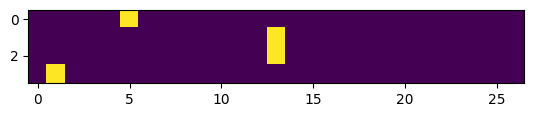

In [94]:
plt.imshow(xenc)

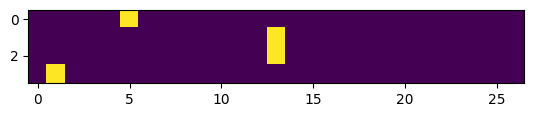

In [96]:
plt.imshow(yenc)

In [99]:
#Neurons do w * x + b, w = weight, b = bias.
# our x's are two vectors. i'm gonna choose to combine these into a matrix so w * x becomes a matmul. I'm gonna combine xenc and yenc into a matrix using the concatenation method along their last dimensions
input_concat = torch.cat([xenc, yenc], dim=1)
W_concat = torch.randn(2 * 27, 27)
output_concat = torch.matmul(input_concat, W_concat)

probs_concat = F.softmax(output_concat, dim=1)
probs_concat

tensor([[0.0108, 0.0011, 0.0294, 0.0059, 0.0036, 0.0031, 0.0493, 0.0190, 0.0322,
         0.0181, 0.0246, 0.1620, 0.0133, 0.0047, 0.0046, 0.0665, 0.0091, 0.1276,
         0.1524, 0.0980, 0.0118, 0.0128, 0.0111, 0.0683, 0.0197, 0.0201, 0.0209],
        [0.0051, 0.0063, 0.1708, 0.0427, 0.0517, 0.0863, 0.0107, 0.1470, 0.0218,
         0.0390, 0.0129, 0.0037, 0.0529, 0.0318, 0.0052, 0.0075, 0.0061, 0.0032,
         0.0699, 0.0555, 0.1155, 0.0247, 0.0020, 0.0006, 0.0040, 0.0028, 0.0205],
        [0.0107, 0.0049, 0.1002, 0.0201, 0.0251, 0.0625, 0.0049, 0.1155, 0.0283,
         0.0026, 0.0057, 0.0137, 0.0114, 0.0656, 0.0623, 0.0112, 0.0138, 0.0009,
         0.0059, 0.0560, 0.1795, 0.0205, 0.0024, 0.0010, 0.0008, 0.0003, 0.1742],
        [0.0071, 0.0075, 0.0065, 0.0018, 0.0022, 0.0031, 0.0029, 0.1849, 0.0609,
         0.0039, 0.0269, 0.0026, 0.0012, 0.2328, 0.0079, 0.0158, 0.0022, 0.0036,
         0.0009, 0.0199, 0.1564, 0.2042, 0.0055, 0.0108, 0.0013, 0.0102, 0.0168]])

In [ ]:
#SUmmary

In [100]:
xs

tensor([ 0,  5, 13, 13])

In [101]:
ys

tensor([ 5, 13, 13,  1])

In [105]:
#randomly initialise 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27,27), generator= g)

In [106]:
xenc = F.one_hot(xs,num_classes = 27).float()#inputs to the network, onehot encoding
yenc = F.one_hot(ys,num_classes = 27).float()#inputs to the network, onehot encoding

input_concat = torch.cat([xenc, yenc], dim=1)
W_concat = torch.randn(2 * 27, 27)
output_concat = torch.matmul(input_concat, W_concat)#These 3 lines of code represent a matrix multiplication between our weights matrix and our input matrix which is just a concatenation of our two input vertices

In [107]:
probs_concat = F.softmax(output_concat, dim=1) #softmax function, we exponentiate the neuron activations, then normalise them so we can interpret them as probabilities
probs_concat

tensor([[0.0056, 0.0119, 0.0441, 0.0265, 0.0231, 0.0118, 0.0361, 0.0063, 0.0255,
         0.0328, 0.0097, 0.0489, 0.0156, 0.0168, 0.0246, 0.3678, 0.0187, 0.0146,
         0.0114, 0.0796, 0.0052, 0.0159, 0.0308, 0.0180, 0.0025, 0.0764, 0.0199],
        [0.0307, 0.0042, 0.1003, 0.1041, 0.0508, 0.0600, 0.0160, 0.0015, 0.0101,
         0.0016, 0.0780, 0.0027, 0.0111, 0.0989, 0.0259, 0.1368, 0.0013, 0.0172,
         0.0198, 0.0166, 0.1639, 0.0023, 0.0054, 0.0015, 0.0064, 0.0211, 0.0116],
        [0.0466, 0.0213, 0.0720, 0.2341, 0.0105, 0.0099, 0.0044, 0.0043, 0.0185,
         0.0143, 0.1511, 0.0183, 0.0032, 0.0614, 0.0414, 0.0620, 0.0082, 0.0205,
         0.0203, 0.0921, 0.0233, 0.0023, 0.0345, 0.0061, 0.0045, 0.0120, 0.0029],
        [0.0578, 0.0031, 0.0054, 0.0007, 0.0039, 0.0032, 0.0132, 0.0147, 0.0439,
         0.0036, 0.0157, 0.0321, 0.0017, 0.0061, 0.0145, 0.0045, 0.0026, 0.0481,
         0.0046, 0.6378, 0.0019, 0.0044, 0.0090, 0.0047, 0.0546, 0.0064, 0.0020]])

In [110]:
nlls = torch.zeros(4)
for i in range(4):
    # i-th trigram
    x = xs[i].item()  # character index two steps back
    y = ys[i].item()  # character index one step back
    z = zs[i].item()  # label character index (next character)
    print('------------')
    print(f'trigram example {i+1}: {ItoS[x]} {ItoS[y]} {ItoS[z]} (indexes {x},{y},{z})')
    print('inputs to the neural net:', x, y)
    print('output probabilities from the neural net:', probs_concat[i])
    print('label (actual next character):', z)
    p = probs_concat[i, z]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("=================")
print("average negative log likelihood, i.e. loss =", nlls.mean().item())

------------
trigram example 1: . e m (indexes 0,5,13)
inputs to the neural net: 0 5
output probabilities from the neural net: tensor([0.0056, 0.0119, 0.0441, 0.0265, 0.0231, 0.0118, 0.0361, 0.0063, 0.0255,
        0.0328, 0.0097, 0.0489, 0.0156, 0.0168, 0.0246, 0.3678, 0.0187, 0.0146,
        0.0114, 0.0796, 0.0052, 0.0159, 0.0308, 0.0180, 0.0025, 0.0764, 0.0199])
label (actual next character): 13
probability assigned by the net to the correct character: 0.0167560838162899
log likelihood: -4.088994026184082
negative log likelihood: 4.088994026184082
------------
trigram example 2: e m m (indexes 5,13,13)
inputs to the neural net: 5 13
output probabilities from the neural net: tensor([0.0307, 0.0042, 0.1003, 0.1041, 0.0508, 0.0600, 0.0160, 0.0015, 0.0101,
        0.0016, 0.0780, 0.0027, 0.0111, 0.0989, 0.0259, 0.1368, 0.0013, 0.0172,
        0.0198, 0.0166, 0.1639, 0.0023, 0.0054, 0.0015, 0.0064, 0.0211, 0.0116])
label (actual next character): 13
probability assigned by the net to the 

In [ ]:
#lets do some gradient based optimization :) 
#randomly initialise 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27,27), generator= g, requires_grad=True)
